In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import sklearn.metrics as metrics
import itertools
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier,
                              AdaBoostClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [4]:
trainfakenews_file = "./data/trainfakenewsdata.csv"
testfakenews_file = "./data/testfakenewsdata.csv"

In [5]:
trainfakenews_df = pd.read_csv(trainfakenews_file)
trainfakenews_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
testfakenews_df = pd.read_csv(testfakenews_file)
testfakenews_df.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [6]:
trainfakenews_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [11]:
testfakenews_df.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [12]:
trainfakenews_df = trainfakenews_df.dropna()
testfakenews_df = testfakenews_df.dropna()

In [14]:
# Set `y` 
y = trainfakenews_df.label 

# Drop the `label` column
trainfakenews_df.drop("label", axis=1)

# Set 'x'
X = trainfakenews_df['text']

# Make training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=53)

In [15]:
# Initialize the `count_vectorizer` 
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the training data 
count_train = count_vectorizer.fit_transform(X_train) 

# Transform the test set 
count_test = count_vectorizer.transform(X_test)

In [16]:
# Initialize the `tfidf_vectorizer` 
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7) 

# Fit and transform the training data 
tfidf_train = tfidf_vectorizer.fit_transform(X_train) 

# Transform the test set 
tfidf_test = tfidf_vectorizer.transform(X_test)

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Accuracy: 95.93%
Confusion matrix


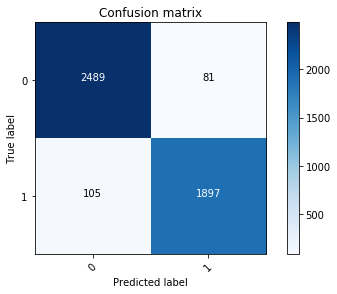

In [18]:
#Initialize a PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train,y_train)
#Predict on the test set and calculate accuracy
y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, y_pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [20]:
clf = MultinomialNB()

Accuracy: 76.36%
Confusion matrix


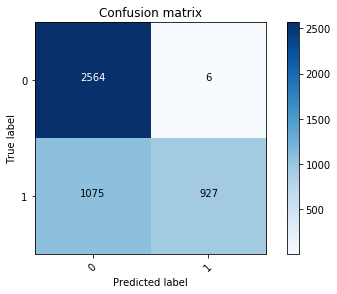

In [21]:
clf.fit(tfidf_train, y_train)
pred = clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [22]:
clf = MultinomialNB() 

Accuracy: 90.92%
Confusion matrix


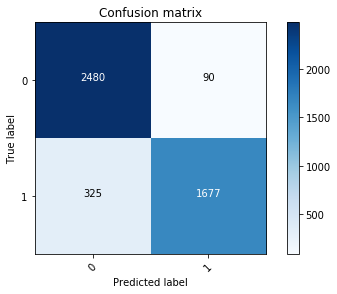

In [23]:
clf.fit(count_train, y_train)
pred = clf.predict(count_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])


In [24]:
linear_clf = PassiveAggressiveClassifier(max_iter=50)

Accuracy: 95.98%
Confusion matrix


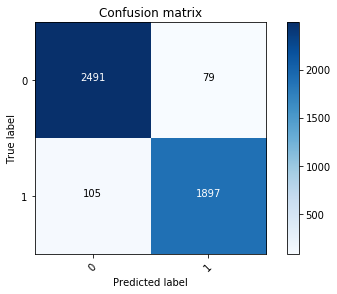

In [35]:
linear_clf.fit(tfidf_train, y_train)
pred = linear_clf.predict(tfidf_test)
score = metrics.accuracy_score(y_test, pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, pred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [26]:
clf = MultinomialNB(alpha=0.1)

In [27]:
last_score = 0
for alpha in np.arange(0,1,.1):
    nb_classifier = MultinomialNB(alpha=alpha)
    nb_classifier.fit(tfidf_train, y_train)
    pred = nb_classifier.predict(tfidf_test)
    score = metrics.accuracy_score(y_test, pred)
    if score > last_score:
        clf = nb_classifier
    print("Alpha: {:.2f} Score: {:.5f}".format(alpha, score))

//anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.00 Score: 0.88386
Alpha: 0.10 Score: 0.90332
Alpha: 0.20 Score: 0.88408
Alpha: 0.30 Score: 0.86461
Alpha: 0.40 Score: 0.84449
Alpha: 0.50 Score: 0.82874
Alpha: 0.60 Score: 0.81409
Alpha: 0.70 Score: 0.80009
Alpha: 0.80 Score: 0.78718
Alpha: 0.90 Score: 0.77472


Accuracy: 96.06%
Confusion matrix


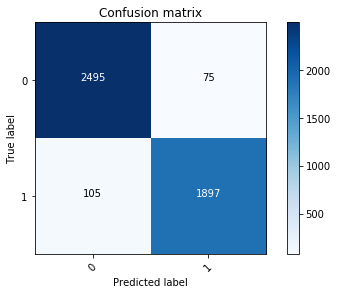

In [40]:
logreg = LogisticRegression(C=1e5)
logreg.fit(tfidf_train, y_train)
y_logpred = logreg.predict(tfidf_test)

score = metrics.accuracy_score(y_test, y_logpred)
print(f'Accuracy: {round(score*100,2)}%')

cm = metrics.confusion_matrix(y_test, y_logpred, labels=[0, 1])
plot_confusion_matrix(cm, classes=[0, 1])

In [24]:
pipelog = Pipeline([('tf', TfidfVectorizer()),('log', LogisticRegression())])
#pipelog.fit(X_train, y_train)

In [25]:
pipepassive = Pipeline([('tf', TfidfVectorizer()),('pac', PassiveAggressiveClassifier())])

In [27]:
log_param = {
    'log__C': [0.1,1,1.5],
    "tf__max_features": [1000, None]
}

In [28]:
gridlog = GridSearchCV(pipelog, log_param, verbose=2, n_jobs= -1)

In [29]:
gridlog.fit(X_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:  2.6min finished
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('tf',
                                        TfidfVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.float64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                       

In [31]:
gridlog.best_params_

{'log__C': 1.5, 'tf__max_features': None}

In [33]:
best_log = gridlog.best_estimator_
best_log.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])